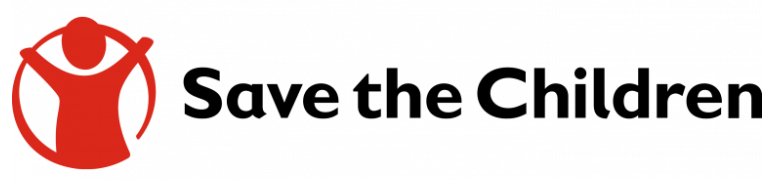

## __VICTOIR SUR LA MALNUTRITION (VIM PLUS)__
## POST DISTRIBUTION MONITORING (PDM) DU TRANSFERT MONETAIRE DES JEUNES 
========================================================================================================================

Ce notebook fournit les syntaxes (In) et les résultat (Out) d’analyse des sections du PDM en rapport avec l’utilisation du Transfer monétaire et de la mise en ouvré du projet.  Les questions de type quantitatives ont été analyser par la production de graphiques principalement de diagramme circulaire t et des tableaux statistiques descriptives. Les données qualitatives ont été analyser à l’aide des méthodes de nuage de mots, sac a mots et   finalement par la production de l’analyse de sentiment. 

Le logiciel Python et des Libraires corolaires ont été utilisés dans le cadre cette analyse. 

### Pre-requis pour l'analyse 

In [1]:
# Importation de bibliothèques de manipulation de données et de calcul numérique
import pandas as pd
import numpy as np
# Importation des bibliothèques de visualisation des données et d'analyse des données exploratoires
import seaborn as sns
import matplotlib.pyplot as plt
# Importation des bibliotheques  pour la production de nuage  et sac de mots et sac pour l'analyse de text 
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
# Importation de la library permettant de traité les texts et de faire une analyze du sentiment 
import nltk
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Chemin d'accès aux données
data ="C:/Users/Nael/Documents/VIM_ML/Data.csv"
# Lecture des données et sauvegard comme df
df = pd.read_csv(data, encoding='latin-1')  

In [3]:
# Determination de la taille de la base de donnée 
print('Le nombre de lignes/jeune et de colonnes/questions sont respectivement de',df.shape[0],'et', df.shape[1]) 

Le nombre de lignes/jeune et de colonnes/questions sont respectivement de 91 et 137


In [4]:
# Creation d'une sous base avec uniquement les données sur l'utilisation du transfer et mise en oeuvre du projet
df1= df.loc[:,'Q44_equipement': 'Q59']

###  I ) ANALYSE DE LA SECTION DU PDM SUR UTILISATION DU TRANSFERT MONETAIRE

## Type de dépenses effectué avec le montant reçu la première fois 

In [6]:
# replace 'True' avec 'oui' and 'False' avec 'Non'
df1['Q44_equipement'] = df1['Q44_equipement'].replace({ True: 'Oui', False: 'Non'})
df1['Q44_fonds_de_roulement'] = df1['Q44_fonds_de_roulement'].replace({ True: 'Oui', False: 'Non'})
df1['Q44_autres'] = df1['Q44_autres'].replace({ True: 'Oui', False: 'Non'})

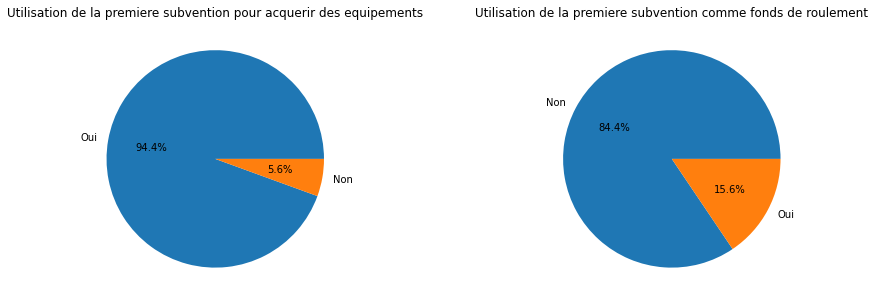

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# graphique sur l'utilisation de la subvention pour acquerir des equipements
count_equipement = df1['Q44_equipement'].value_counts()
plt.subplot(1,2,1)
plt.pie(count_equipement, labels=count_equipement.index,autopct='%1.1f%%')
plt.title('Utilisation de la premiere subvention pour acquerir des equipements')
# graphique sur l'utilisation de la subvention comme fonds de roulement 
count_fond_roulement = df1['Q44_fonds_de_roulement'].value_counts()
plt.subplot(1,2,2)
plt.pie(count_fond_roulement, labels=count_fond_roulement.index,autopct='%1.1f%%')
plt.title('Utilisation de la premiere subvention comme fonds de roulement')

plt.show()

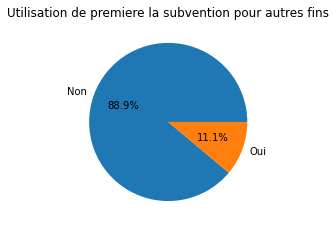

In [8]:
# graphique sur l'utilisation de la subvention a d'autre fins
plt.figure(figsize=(8, 8))
count_autres = df1['Q44_autres'].value_counts()
plt.subplot(2,2,3)
plt.pie(count_autres, labels=count_autres.index,autopct='%1.1f%%')
plt.title('Utilisation de premiere la subvention pour autres fins')

plt.show()

## A reçu la deuxième tranche de la subvention

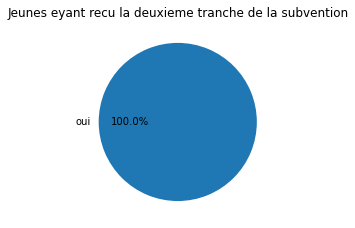

In [9]:
# graphique pour la reception de la deuximeme tranche 
plt.figure(figsize=(8, 8))
count_2emetranche  = df1['Q45'].value_counts()
plt.subplot(2,2,3)
plt.pie(count_2emetranche, labels=count_2emetranche.index,autopct='%1.1f%%')
plt.title('Jeunes eyant recu la deuxieme tranche de la subvention')
plt.show()

## Type de dépenses effectué avec le montant reçu la deuxieme fois

In [10]:
# replace 'True' avec 'oui' and 'False' avec 'Non'
df1['Q45_2_equipement'] = df1['Q45_2_equipement'].replace({ True: 'Oui', False: 'Non'})
df1['Q45_2_fonds_de_roulement'] = df1['Q45_2_fonds_de_roulement'].replace({ True: 'Oui', False: 'Non'})
df1['Q45_2_autres'] = df1['Q45_2_autres'].replace({ True: 'Oui', False: 'Non'})

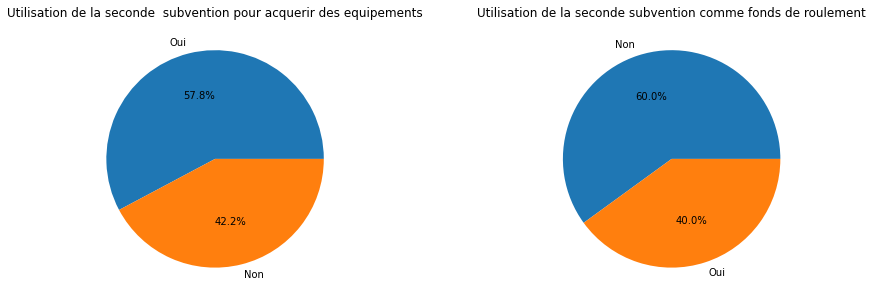

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# graphique sur l'utilisation de la subvention pour acquerir des equipements la deuxieme fois
count_equipement1 = df1['Q45_2_equipement'].value_counts()
plt.subplot(1,2,1)
plt.pie(count_equipement1, labels=count_equipement1.index,autopct='%1.1f%%')
plt.title('Utilisation de la seconde  subvention pour acquerir des equipements')
# graphique sur l'utilisation de la subvention comme fonds de roulement la deuxieme fois
count_fond_roulement1 = df1['Q45_2_fonds_de_roulement'].value_counts()
plt.subplot(1,2,2)
plt.pie(count_fond_roulement1, labels=count_fond_roulement1.index,autopct='%1.1f%%')
plt.title('Utilisation de la seconde subvention comme fonds de roulement')

plt.show()

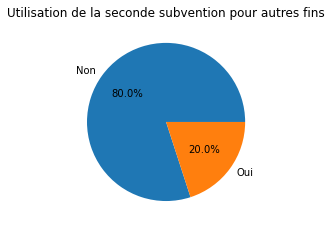

In [12]:
# graphique sur l'utilisation de la subvention a d'autre fins
plt.figure(figsize=(8, 8))
count_autres = df1['Q45_2_autres'].value_counts()
plt.subplot(2,2,3)
plt.pie(count_autres, labels=count_autres.index,autopct='%1.1f%%')
plt.title('Utilisation de la seconde subvention pour autres fins')

plt.show()

__Trouvaille # 1:__   94% des jeunes ont utilisé la première subvention pour l’acquisition d’équipements. Ce pourcentage d’utilisation a diminué lors de la deuxième subvention (58%) au profit d’une utilisation comme fond de roulement. 

 ## Le montant a-t-il permis de couvrir les besoins de votre projet ?

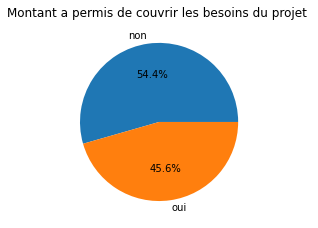

In [13]:
# graphique sur l'utilisation de la subvention a d'autre fins
plt.figure(figsize=(8, 8))
count_autres = df1['Q46'].value_counts()
plt.subplot(2,2,3)
plt.pie(count_autres, labels=count_autres.index,autopct='%1.1f%%')
plt.title('Montant a permis de couvrir les besoins du projet ')
plt.show()

__Trouvaille # 2:__ Un peu plus de 50% des jeunes ont dit que les montants recus n'ont pas permis de couvrir l'ensemble des besoin pour developer leur projet

## Pourquoi le montant n'a pas permis de couvrir les besoins du projet?

La response a cette question etant fournit comme texte, nous allons tout d'abord faire l'analyse en generant un "Nuage de mots". Cette premiere approche va nous fournir une représentation qualitative du texte avec un visuel  qui donnera une collection, ou un groupe, de mots représentés en différentes tailles. Plus le mot apparaît gros et gras, plus il est mentionné souvent et plus il est important. Grace a ce graphique, on pourra extraire les parties les plus pertinentes pour lesquelle les jeunes pensent que le montant n'a pas permis de couvrir les besoins de leur projet. 


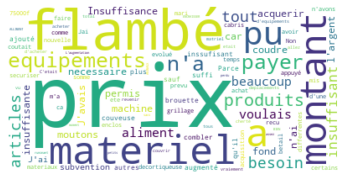

In [14]:
#  Combinaison de tous les textes de la colonne Q46_1 (pourquoi le montant n'a pas permis de couvrir les besoins)
# ce code aussi enleve toutes les valeurs manquantes de la colonnes du au fait que certain ont dit le contraire
text = " ".join(str(review) for review in df1['Q46_1'].astype(str) if str(review) != 'nan')

# Chargement des mots d'arrêt français à partir de nltk
stop_words_fr = set(stopwords.words('french'))

# Creation d'un objet de nuage de mots en tenant compte des mots d'arret francais
wordcloud = WordCloud(background_color="white", max_words=150, stopwords=stop_words_fr)

# Generation du nuage de mots
wordcloud = wordcloud.generate(text)

# grahique du nuage de mots
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

__Trouvaille  # 3:__ Le graphique ci-dessus montre que prix, matériels, flambé et montant ont été les mots les plus utilisés. En connectant ces mots, il semble qu’une grande partie des jeunes estiment que le montant n’a pas été suffisant pour couvrir totalement les couts d’acquisition de matériels a cause du augmentation de prix.

Pour completer notre analyse, nous allons utilisé un sac de mots (Bag of Words / BoW)  qui est une technique dans le domaine  du traitement  du langage naturel qui représente un document textuel comme un sac de mots, sans tenir compte de la grammaire et de l'ordre des mots, mais en conservant la fréquence de chaque mot. La principale différence entre les sacs de mots et le nuage de mots que nous avons realisé ci-dessus est que les sacs de mots nous donne une représentation quantitative du texte, tandis que le nuages de mots nous donne une représentation qualitative du texte.Dans un sac de mots, les mots sont représentés par leur fréquence d'apparition dans le texte. Il ne tient pas compte de l'aspect visuel ou du contexte du texte.

Et pour finir nous allons calculer le nombre de fois (pourcentage) que la raison mentionnée est liée soit a une augmentation du prix et/ou a la chereté  et ceci parmis les jeunes qui disent que le montant n'a pas permis de couvrir les besoins.

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


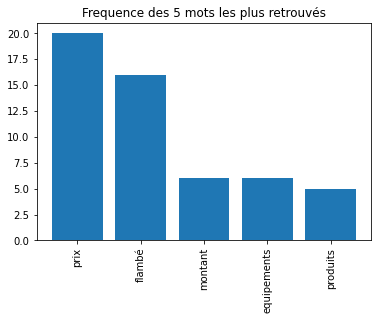

In [15]:
# Definition des mots d'arrets (mots a ne pas considerés)
stop_words = ['le', 'la', 'les', 'des', 'de', 'pour', 'et', 'pas','une','pu','je','tout']

# Create an instance of the CountVectorizer class with stop words
count_vect = CountVectorizer(stop_words=stop_words)

# Fit the vectorizer to the text
count_vect.fit([text])

# Convert the text to a bag of words
bag_of_words = count_vect.transform([text])

# Get the word frequencies
word_freq = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()

# Get the vocabulary
vocab = count_vect.get_feature_names()

# Sort the word frequencies in descending order
word_freq_sorted = sorted(zip(word_freq, vocab), reverse=True)

# Get the top 10 most frequent words and their frequencies
top_10_freq = [wf[0] for wf in word_freq_sorted[:5]]
top_10_words = [wf[1] for wf in word_freq_sorted[:5]]

# Create the bar chart
plt.bar(top_10_words, top_10_freq)
plt.title('Frequence des 5 mots les plus retrouvés')
plt.xticks(rotation=90)
plt.show()

__Trouvaille # 4:__ Le bar chart ci-dessus concorde avec le nuage de mots et montre les cinq mots les plus fréquemment mentionnés par les jeunes pour expliquer pourquoi le montant n'a pas permis de couvrir le besoins. Le mot ‘prix’ a été mentionné 20 fois suivi de ‘flambé’. 

In [16]:
# Definition de la list des mots a checker dans les raison 
mots_specifiques = ['prix', 'cherté']
# Creation d'une nouvelle colonne pour faire etait de la presence des mots specifiques (prix, cherté) 
df1['mots_specifique_trouvé'] = df1['Q46_1'].apply(lambda x: 1 if isinstance(x, str) and any(mots in x for mots in mots_specifiques) else 0)

In [17]:
# creation d'une variable qui compte le nombre de fois que les mots specifiques se retrouvent
comptage_mots_specifiques = df1['mots_specifique_trouvé'].value_counts()[1]
# Creation d'une variable qui compte le nombre de fois les gens ont dit que le montant etait insuffisant 
comptage_insufisant = df1['Q46'].value_counts()[0]
# Creation d'une varialbe qui calcule le pourcentage de fois que les mots specifique se retrouve 
pourcentage_mots_specifique =  (comptage_mots_specifiques / comptage_insufisant) *100

__Trouvaille # 5__: Des 54% des jeunes qui disent que le montant n'a pas ete suffisant, 43% on fait etat d'une augmentation du prix et/ou a la chereté du materiels comme justification 

### Avez-vous reçu un soutien d’autres personnes pour soutenir votre activité ?

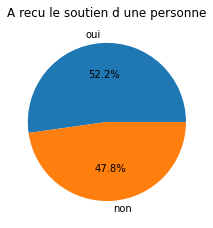

In [18]:
# graphique sur l'utilisation de la subvention a d'autre fins
plt.figure(figsize=(8, 8))
count_autres = df1['Q47'].value_counts()
plt.subplot(2,2,3)
plt.pie(count_autres, labels=count_autres.index,autopct='%1.1f%%')
plt.title('A recu le soutien d une personne')

plt.show()

 ### Si oui vous avez recu un soutient, de qui?

In [19]:
# replace 'True' avec 'oui' and 'False' avec 'Non'
df1['Q47_1_famille'] = df1['Q47_1_famille'].replace({ True: 'Oui', False: 'Non'})
df1['Q47_1_mentor'] = df1['Q47_1_mentor'].replace({ True: 'Oui', False: 'Non'})
df1['Q47_1_services_du_gouvernement'] = df1['Q47_1_services_du_gouvernement'].replace({ True: 'Oui', False: 'Non'})
df1['Q47_1_caisses_epargne'] = df1['Q47_1_caisses_epargne'].replace({ True: 'Oui', False: 'Non'})

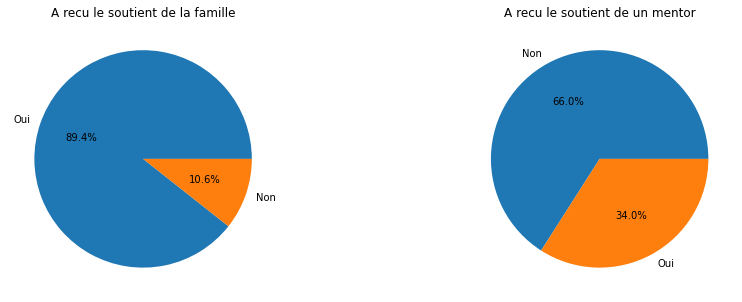

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# graphique sur soutient famille
soutient_famille = df1['Q47_1_famille'].value_counts()
plt.subplot(1,2,1)
plt.pie(soutient_famille, labels=soutient_famille.index,autopct='%1.1f%%')
plt.title('A recu le soutient de la famille')
# graphique sur soutient mentor
soutient_mentor = df1['Q47_1_mentor'].value_counts()
plt.subplot(1,2,2)
plt.pie(soutient_mentor, labels=soutient_mentor.index,autopct='%1.1f%%')
plt.title('A recu le soutient de un mentor')

plt.show()

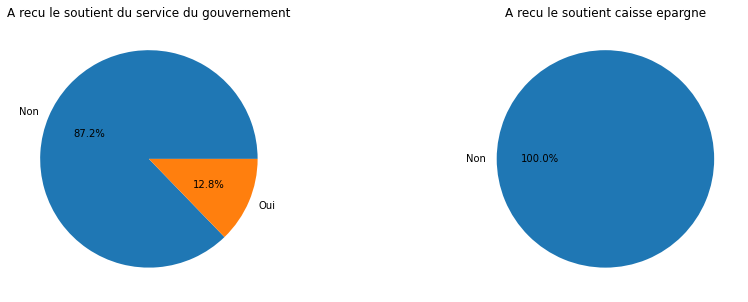

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# graphique sur soutient service du gouvernement
soutient_gouvernement = df1['Q47_1_services_du_gouvernement'].value_counts()
plt.subplot(1,2,1)
plt.pie(soutient_gouvernement, labels=soutient_gouvernement.index,autopct='%1.1f%%')
plt.title('A recu le soutient du service du gouvernement')
# graphique sur soutient caisse d'epargne
soutient_caisse = df1['Q47_1_caisses_epargne'].value_counts()
plt.subplot(1,2,2)
plt.pie(soutient_caisse, labels=soutient_caisse.index,autopct='%1.1f%%')
plt.title('A recu le soutient caisse epargne')

plt.show()

### Si vous avez reçu un soutien d'autres personnes, préciser le type de soutien

In [22]:
# replace 'True' avec 'oui' and 'False' avec 'Non'
df1['Q47_3_equipement'] = df1['Q47_3_equipement'].replace({ True: 'Oui', False: 'Non'})
df1['Q47_3_terrain'] = df1['Q47_3_terrain'].replace({ True: 'Oui', False: 'Non'})
df1['Q47_3_batiments'] = df1['Q47_3_batiments'].replace({ True: 'Oui', False: 'Non'})
df1['Q47_3_conseils'] = df1['Q47_3_conseils'].replace({ True: 'Oui', False: 'Non'})
df1['Q47_3_cash'] = df1['Q47_3_cash'].replace({ True: 'Oui', False: 'Non'})

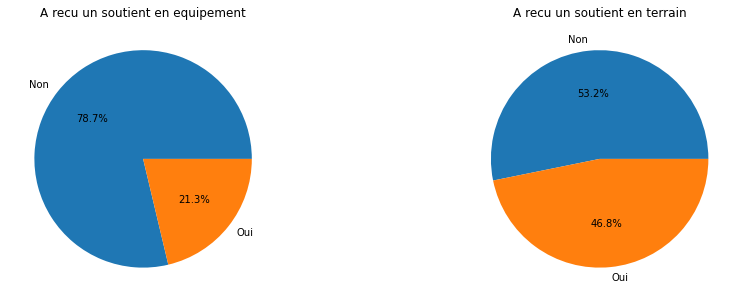

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# graphique sur soutient en equipement
soutient_equipement  = df1['Q47_3_equipement'].value_counts()
plt.subplot(1,2,1)
plt.pie(soutient_equipement, labels=soutient_equipement.index,autopct='%1.1f%%')
plt.title('A recu un soutient en equipement')
# graphique sur soutient en terrain
soutient_terrain = df1['Q47_3_terrain'].value_counts()
plt.subplot(1,2,2)
plt.pie(soutient_terrain, labels=soutient_terrain.index,autopct='%1.1f%%')
plt.title('A recu un soutient en terrain')

plt.show()

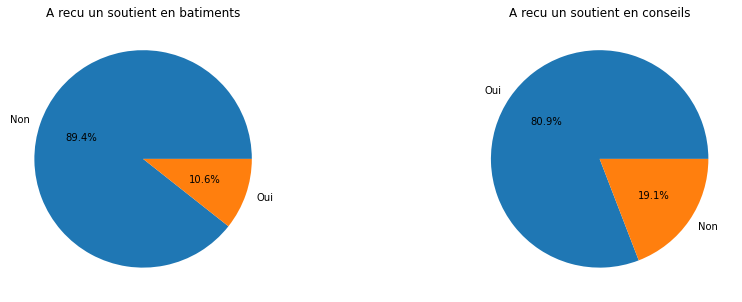

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# graphique sur soutient en batiment
soutient_batiments  = df1['Q47_3_batiments'].value_counts()
plt.subplot(1,2,1)
plt.pie(soutient_batiments, labels=soutient_batiments.index,autopct='%1.1f%%')
plt.title('A recu un soutient en batiments')
# graphique sur soutient en conseil
soutient_conseils = df1['Q47_3_conseils'].value_counts()
plt.subplot(1,2,2)
plt.pie(soutient_conseils, labels=soutient_conseils.index,autopct='%1.1f%%')
plt.title('A recu un soutient en conseils')

plt.show()

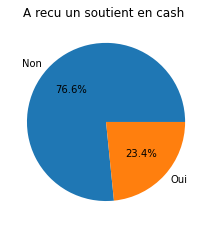

In [25]:
# graphique sur un soutient en cash 
plt.figure(figsize=(8, 8))
soutient_cash = df1['Q47_3_cash'].value_counts()
plt.subplot(2,2,3)
plt.pie(soutient_cash, labels=soutient_cash.index,autopct='%1.1f%%')
plt.title('A recu un soutient en cash ')

plt.show()

__Trouvaille # 6__:   90%  des jeunes qui ont révélé avoir reçu un soutien d’une autre personne (52%), l’on reçu de la famille.   Et le soutient est majoritairement donné sous forme de conseils (80%). 

### Avez-vous participé à l’étude sur les opportunités de travail pour les jeunes ? 

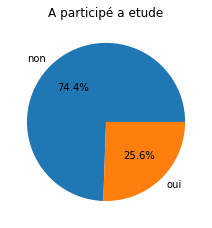

In [26]:
# graphique sur la participation  a l'etude
plt.figure(figsize=(8, 8))
etude = df1['Q48'].value_counts()
plt.subplot(2,2,3)
plt.pie(etude, labels=etude.index,autopct='%1.1f%%')
plt.title('A participé a etude')
plt.show()

### II) ANALYSE DE LA SECTION DU PDM SUR  MISE EN ŒUVRE DU PROJET

### Quelle est la nature de votre projet ?

In [27]:
# Correction value label
df1['Q49'] = df1['Q49'].replace({ 'renforcement_d_une_activit__existante': 'Renforcement activité existante', 'cr_ation_de_nouvelle_entreprise': 'Creation nouvelle entreprise'})

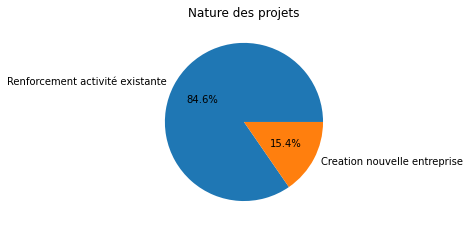

In [28]:
# graphique sur la nature de votre projet
plt.figure(figsize=(8, 8))
etude = df1['Q49'].value_counts()
plt.subplot(2,2,3)
plt.pie(etude, labels=etude.index,autopct='%1.1f%%')
plt.title('Nature des projets')
plt.show()

### Quels défis avez-vous rencontré dans le démarrage et la mise en œuvre de votre projet ?

In [29]:
df1['Q50_approvisionnement_prix_matieres_premieres'] = df1['Q50_approvisionnement_prix_matieres_premieres'].replace({ True: 'Oui', False: 'Non'})
df1['Q50_acces_au_marche'] = df1['Q50_acces_au_marche'].replace({ True: 'Oui', False: 'Non'})
df1['Q50_inflation'] = df1['Q50_inflation'].replace({ True: 'Oui', False: 'Non'})
df1['Q50_gestion'] = df1['Q50_gestion'].replace({ True: 'Oui', False: 'Non'})
df1['Q50_financement'] = df1['Q50_financement'].replace({ True: 'Oui', False: 'Non'})
df1['Q50_autres'] = df1['Q50_autres'].replace({ True: 'Oui', False: 'Non'})

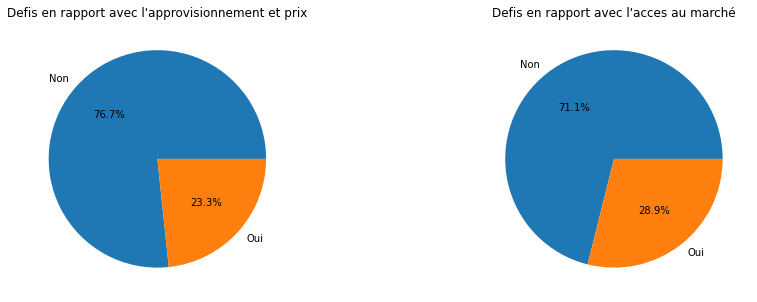

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# graphique sur defis en rapport avec l'approvisionnement et  prix matiere premiere  
matiere_premiere  = df1['Q50_approvisionnement_prix_matieres_premieres'].value_counts()
plt.subplot(1,2,1)
plt.pie(matiere_premiere, labels=matiere_premiere.index,autopct='%1.1f%%')
plt.title("Defis en rapport avec l'approvisionnement et prix")
# graphique sur defis en rapport avec l'acces au marché
acces_marche = df1['Q50_acces_au_marche'].value_counts()
plt.subplot(1,2,2)
plt.pie(acces_marche, labels=acces_marche.index,autopct='%1.1f%%')
plt.title("Defis en rapport avec l'acces au marché")

plt.show()

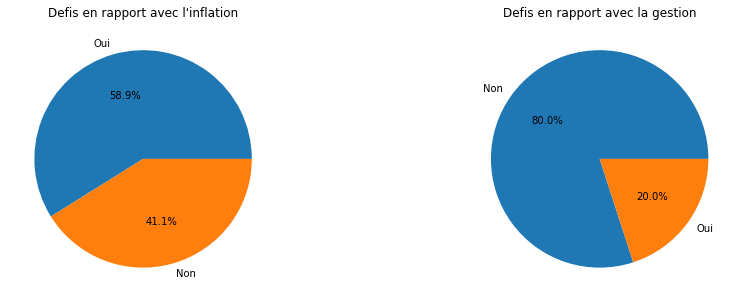

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# graphique sur defis en rapport avec l'inflation   
inflation  = df1['Q50_inflation'].value_counts()
plt.subplot(1,2,1)
plt.pie(inflation, labels=inflation.index,autopct='%1.1f%%')
plt.title("Defis en rapport avec l'inflation")
# graphique sur defis en rapport avec la gestion
gestion = df1['Q50_gestion'].value_counts()
plt.subplot(1,2,2)
plt.pie(gestion, labels=gestion.index,autopct='%1.1f%%')
plt.title("Defis en rapport avec la gestion")

plt.show()

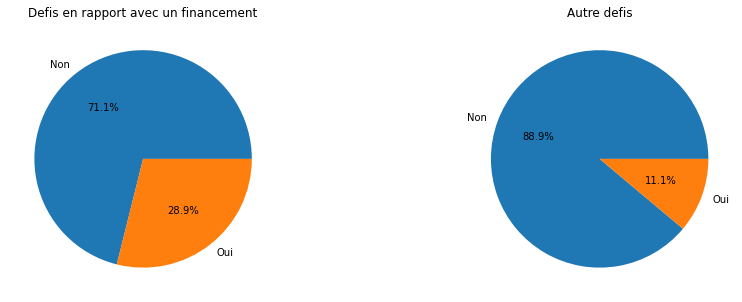

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# graphique sur defis en rapport avec un financement    
financement  = df1['Q50_financement'].value_counts()
plt.subplot(1,2,1)
plt.pie(financement, labels=financement.index,autopct='%1.1f%%')
plt.title("Defis en rapport avec un financement")
# graphique sur  autres
autre_defis = df1['Q50_autres'].value_counts()
plt.subplot(1,2,2)
plt.pie(autre_defis, labels=autre_defis.index,autopct='%1.1f%%')
plt.title("Autre defis")

plt.show()

__Trouvaille # 7__: La majorité des projets sont de type "renforcement d’activité existante".  Aligné sur les trouvailles précédentes, 60% des jeunes ont fait état de l’inflation comme un défis dans la mise en œuvre de leur projet

### Quel etait le chiffre d'affaire avant et apres subvention ?

Nous allons  non seulement regarder les statistique descriptives du chiffre d’affaire avant et après la subvention  mais aussi déterminer le pourcentage de jeune qui ont utilisé la subvention pour le renforcemnt d'une activité existante et qui ont eu une augmentation du chiffre d’affaire. 

In [33]:
# Statistique descriptive du chiffre d'affaire affaire avant (Q51)  et apres (Q52) la subvention
df1[['Q51', 'Q52']].describe()

,Q51,Q52
count,66.000000,77.000000
mean,149848.484848,220032.467532
std,119750.444666,191679.700241
min,15000.000000,0.000000
25%,71250.000000,90000.000000
50%,122500.000000,200000.000000
75%,195000.000000,300000.000000
max,800000.000000,1000000.000000


In [34]:
# Creation d'une colonne qui donne la diffeernce du chiffre d'affaire
df1['difference_chiffre_affaire'] = df1['Q52'] - df1['Q51']
# Creation d'une colonne qui indique si la difference du chiffre d'affaire est positive 
df1['difference_chiffre_affaire_positive'] = df1['difference_chiffre_affaire'].apply(lambda x: 1 if x > 0 else 0)
# Calcul du pourcentage de jeune avec difference de chiffre d'affair positive 
pourcentage_positive = df1['difference_chiffre_affaire_positive'].mean() * 100
print(" Le pourcentage de jeunes ayant une augmentation du chiffre d'affaire est de: {:.2f}%".format(pourcentage_positive))

 Le pourcentage de jeunes ayant une augmentation du chiffre d'affaire est de: 62.64%


### Quel était votre bénéfice annuel avant et apres la subvention? 

Nous allons  non seulement regarder les statistique descriptives des benefice annual avant et après la subvention  mais aussi déterminer le pourcentage de jeune qui ont utilisé la subvention pour le renforcemnt d'une activité existante et qui  ont eu une augmentation du benefice annuel. 

In [35]:
# Statistique descriptive du benefice  avant (Q53)  et apres (Q54) la subvention
df1[['Q53', 'Q54']].describe()

,Q53,Q54
count,66.000000,7.700000e+01
mean,65893.939394,1.273701e+05
std,52859.866640,2.624496e+05
min,10000.000000,0.000000e+00
25%,25000.000000,2.500000e+04
50%,57500.000000,9.000000e+04
75%,98750.000000,1.500000e+05
max,300000.000000,2.250000e+06


In [36]:
# Creation d'une colonne qui donne la diffeernce du benefice annuel
df1['difference_benefice'] = df1['Q54'] - df1['Q53']
# Creation d'une colonne qui indique si la difference du benefice annuel est positive 
df1['difference_benefice_positive'] = df1['difference_benefice'].apply(lambda x: 1 if x > 0 else 0)
# Calcul du pourcentage de jeune avec difference de benefice annuel  positive 
pourcentage_positive1 = df1['difference_benefice_positive'].mean() * 100
print(" Le pourcentage de jeunes ayant une augmentation de benefice est de: {:.2f}%".format(pourcentage_positive1))

 Le pourcentage de jeunes ayant une augmentation de benefice est de: 59.34%


__Trouvaille # 8__: Des jeunes qui ont utilisé les subventions pour le renforcement d'une activité existante, 63% et 59%  ont eut respectivement une augmentation du chiffre d'affaire et des benefices.  

### La subvention a-t-elle répondu à vos attentes en matière de soutien au démarrage ou de renforcement de votre entreprise ? 

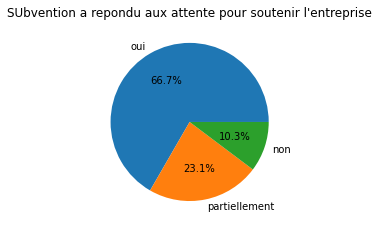

In [37]:
plt.figure(figsize=(8, 8))
etude = df1['Q55'].value_counts()
plt.subplot(2,2,3)
plt.pie(etude, labels=etude.index,autopct='%1.1f%%')
plt.title("SUbvention a repondu aux attente pour soutenir l'entreprise")
plt.show()

###  En quoi la subvention a contribue à la reussite de votre projet d'entreprise ? 

La response a cette question etant fournit comme texte, nous allons tout d'abord faire l'analyse en generant un "Nuage de mots" suivi d'un sac a mots.

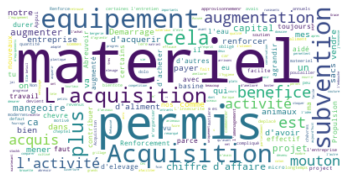

In [38]:
# Combinaison de tous les textes de Q56 (En quoi la subvention a contribue à la reussite de votre projet d'entreprise)
text1 = " ".join(str(review) for review in df1['Q56'].astype(str) if str(review) != 'nan')
#stop_words_fr = set(stopwords.words('french'))
stop_words_fr1 =  ['le', 'a','la', 'les', 'des', 'de', 'pour', 'et', 'pas','une','pu','je','tout', "j'ai","mon","nous","du","l'","m'a","en","que","me"]
# Creation d'un objet de nuage de mots en tenant compte des mots d'arret francais
wordcloud1 = WordCloud(background_color="white", max_words=350, stopwords=stop_words_fr1)
# Generation du nuage de mots
wordcloud1 = wordcloud1.generate(text1)
# grahique du nuage de mots
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ai'] not in stop_words.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


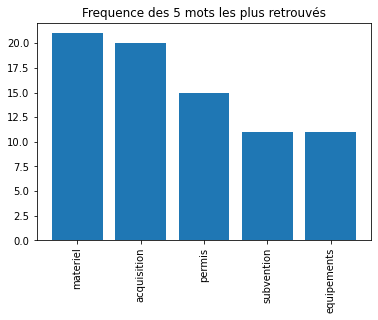

In [39]:
# Create an instance of the CountVectorizer class with stop words
count_vect = CountVectorizer(stop_words=stop_words_fr1)

# Fit the vectorizer to the text
count_vect.fit([text1])

# Convert the text to a bag of words
bag_of_words = count_vect.transform([text1])

# Get the word frequencies
word_freq = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()

# Get the vocabulary
vocab = count_vect.get_feature_names()

# Sort the word frequencies in descending order
word_freq_sorted = sorted(zip(word_freq, vocab), reverse=True)

# Get the top 10 most frequent words and their frequencies
top_10_freq = [wf[0] for wf in word_freq_sorted[:5]]
top_10_words = [wf[1] for wf in word_freq_sorted[:5]]

# Create the bar chart
plt.bar(top_10_words, top_10_freq)
plt.title('Frequence des 5 mots les plus retrouvés')

plt.xticks(rotation=90)
plt.show()

__Trouvaille 9__ De manière globale, les jeunes ont surtout fait ressortirle fait  que la subvention a permis de faire  l’acquisition de matériels

Pour compléter les résultats ci-dessus, nous allons appliquer la  technique  de l'analyse des sentiments, également connue sous le nom d'exploration d'opinion.  Cette approche  est un processus d'analyse et d'identification des émotions et des attitudes exprimées dans un texte, tel qu'une critique, ou un retour d'information de la part d'un client. Dans ce cas ci, il s'agira d'analyser l'opinion des jeunes par rapport la contribution de la subvention dans la reussite de leur entreprise. L'objectif de l'analyse des sentiments  sera donc de déterminer, a travers l'analyse de texte,  c'est a dire si les jeunes expriment un sentiment positif, négatif ou neutre à l'égard de la contribution de la subvention.

Pour faire cette analyse nous allons faire appel a  un des très populaire Library   utilisé pour le traitement de texte, le Natural Language Toolkit (NLTK) du logiciel de programation Python. NLTK fournit plusieurs outils pour l'analyse des sentiments, notamment le module Sentiment Intensity Analyzer (SIA), qui est un modèle pré-entraîné pour l'analyse des sentiments, basé sur un lexique de mots et de phrases qui ont été étiquetés avec des scores de sentiments positifs, négatifs ou neutres.

L'analyseur de sentiments que nous allons  utilisé  va fournir quatre scores pour décrire le sentiment des jeunes  exprimé dans le text par rapport a la contribution de la subvention :

* Le score "neg" représente la négativité du texte, allant de 0 (pas négatif) à 1 (très négatif).

* Le score "neu" représente la neutralité du texte, allant de 0 (pas neutre) à 1 (complètement neutre).

* Le score "pos" représente la positivité du texte, allant de 0 (pas positif) à 1 (très positif).

* Le score "composé" représente un score global de sentiment, allant de -1 (très négatif) à 1 (très positif), qui combine les scores "neg", "neu" et "pos".




In [40]:
# Ajout d'un point a la fin de chaque commentaire 
df1['Q56'] = df1['Q56'].apply(lambda x: str(x) + '.' if not pd.isna(x) else '')

In [41]:
# Extraction du text qui regroupe l'ensemble des commentaires sans tenir compte de valeurs manquantes
text1 = " ".join(str(review) for review in df1['Q56'].astype(str) if str(review) != 'nan')

In [42]:
# Impression du text de la colonne Q56
text1

"La subvention m'a permis d'avoir une augmentation de benefice. Acquisition du materiel. Une augmentation des benefice. Demarrage effectif de mon project. Acquisition du materiel d'elevage.      Demarrage effectif de l'activité. Cela m'a permis de renforcer mon entreprise. Propulsion du micro entreprise  augmentation du benefice. Appui en equipement qui facilte le travail  approvisonnemenr de la matiere 1ere en quantité. Acquisiton materiel  augmentation du chiffre d'affaire et propulsion  de l'entreprise. Acquisition de materiels et l'amenagement du poulailler. Acquisition de materiel modernes, augmenter le chiffre d'affaires. Non acquisition de tout le materiel. Renforce le peu que tu avais pour le demarrage et tu es motivé d'avoir eu du soutien. Acquisition de materiel qui va durer longtemps,on va  bientote  vendre  car l'entretien  devient  de plus en plus  compliqué. Le mateeriel  acquis est toujours  la\xa0 pour  mener a\xa0 bien  l'activité,j'ai pu payer  2 chèvres et je m'organ

Note:  Afin de continuer le traitement le text sera  traduit en englais a l'aide du traducture https://www.deepl.com/fr/translatordeeple.com pour ensuite alimenter l'analyzeur du sentiment 

In [43]:
text_translated = "The grant allowed me to have an increase in profit. Acquisition of equipment. An increase in profit. Effective start of my project. Acquisition of breeding material.      Effective start of the activity. This allowed me to strengthen my business. Propulsion of the micro enterprise increase of profit. Support in equipment that facilitates the work supply of raw material in quantity. Acquisition of equipment, increase of the turnover and propulsion of the company. Acquisition of materials and fitting out of the poultry house. Acquisition of modern equipment, increase the turnover. No acquisition of all the equipment. Strengthen the little you had for the start-up and you are motivated to have had support. Acquisition of equipment that will last for a long time, we will sell it because the maintenance becomes more and more complicated. The acquired equipment is still sufficient to carry out the activity, I was able to pay 2 goats and I organize myself to start selling the dolo. Acquisition of material which will last, increase of my livestock. Reinforcement of the activity and equipments to carry out the activity. The acquired material is still needed to carry out the activity. The grant has helped expand my project. The grant has helped increase my annual profits. We lack security because we are displaced and have to sell some of our crops. The grant has increased my income.     Acquisition of equipment and food. Reinforcement of the equipment and an additional sheep. Acquisition of equipment, I cultivated the idea of competition. I got equipment. Equipment, open-mindedness.  Thanks to the subsidy, I acquired materials (1 Barque to stop water and 2 big plastic dishes for food) and 3 bags of food (cotton bags). The number of animals has increased from 1 goat and 2 sheep before the subsidy to 5 goats and 3 sheep after the subsidy. The subsidy allowed me to acquire some very important materials in the field of sewing and this has greatly improved my activity. These materials allow me to be more efficient than before. a stock of food (4 bags of hay), a basin as a feeder, a wheelbarrow for cleaning the sheepfold all this has allowed me to strengthen my breeding activity. I have noticed an increase in my income. I bought 1 wire fence, 2 basins (one as a feeder and the other as a trough), 4 bags of feed to boost my breeding. With the equipment we manage to feed our animals well. In equipment. Allowed to pay for adapted equipment. The equipment (waterer and feeder) has improved the hygiene and quality of life of our animals. The grant allowed us to buy equipment and two sheep. Because I save more my fodder and water conservation has become easy. It allowed me to start my activity. It allowed me to expand my project. It allowed us to do the fattening of small ruminants (sheep). We were able to expand our project. The grant helped us in our activity. The grant helped us in our activity. It facilitated the purchase of inputs, equipment, and animals. It allowed us to strengthen the equipment. It allowed me to acquire certain materials. The acquisition of materials. The acquisition of materials. The acquisition of equipment. Acquisition of equipment. Acquisition of equipment. Partially acquired equipment. Acquisition of equipment. Acquisition of equipment. Project in progress. The most equipment acquired. Acquisition of equipment. Acquisition of equipment. Acquisition of equipment. None . I have seen my turnover increased. my capital has increased. you have to compare my profits. it has increased my capital. My profit is more now. My capital has increased. My capital has increased significantly.  I was able to acquire working materials. Allowed me to acquire other equipment. It allows to have other equipments. Increased the turnover of my company. Allowed me to buy new equipment. It allowed me to pay for new equipment. I paid for equipment that I did not have (buckets, feeder, waterer) only for the animals."

In [44]:
# Initialization du analyzeur du sentiment 
sia = SentimentIntensityAnalyzer()
# Application de l'analyzeur du sentiment sur le text traduit
scores = sia.polarity_scores(text_translated)
# Affichage des scores de sentiment 
print(scores)

{'neg': 0.015, 'neu': 0.793, 'pos': 0.192, 'compound': 0.9987}


__Trouvaille 10:__


Dans le cas de cette question, le score "neg" est de 0,015, ce qui est très faible et indique que le texte n'est pas négatif. Le score "neu" est de 0,793, ce qui est relativement élevé, indiquant que le texte est plutôt neutre. Le score "pos" est de 0,192, ce qui est également relativement élevé, indiquant que le texte est plutôt positif. Enfin, le score "compound" est de 0,9987, ce qui est très proche de 1, indiquant que le texte est très positif.
Dans l'ensemble, l'analyseur de sentiments suggère que les jeunes ont une opignons principalement neutre, mais avec un sentiment légèrement positif par rapport a la contribution de la subvention pour le developement de leur activité.  
